<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

---

---

## Regression

### Dataset

In [3]:
# Load the dataset
noise = pd.read_csv(
    "data/airfoil_self_noise.dat",
    delimiter="\t",
    names=[
        "frequency",
        "angle",
        "chord_length",
        "free_stream_velocity",
        "displacement_thickness",
        "self_noise",
    ],
)

**Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?**

An airfoil is the cross-sectional shape of a wing; blade of a propeller rotor or turbine.  The data was obtained from a series of aerodynamic and acoustic tests of airfoil blade conducted in an wind tunnel. Its target feature is scaled sound pressure level, based on the following features: Angle of attack, in degrees; Chord length, in meter;  Free-stream velocity, in meters per secon;  Suction side displacement thickness, in meters. Noise generated by aircrafts and other technology that uses blades (like wind turbines) is important to reduce. High noise likely means higher ineffiency (becuase there is more draft) and also results in higher noise pollution. Thus, optimizing noise is beneficial. 

**Find out how many rows and columns are in `noise`**

In [4]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
noise.shape

(1503, 6)

**Find out what data types are present**

In [6]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

**Find out how many null values there are in each columns**

In [7]:
noise.isna().sum() #nice

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

**Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion**

In [8]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


**Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots**

array([[<AxesSubplot:title={'center':'frequency'}>,
        <AxesSubplot:title={'center':'angle'}>],
       [<AxesSubplot:title={'center':'chord_length'}>,
        <AxesSubplot:title={'center':'free_stream_velocity'}>],
       [<AxesSubplot:title={'center':'displacement_thickness'}>,
        <AxesSubplot:title={'center':'self_noise'}>]], dtype=object)

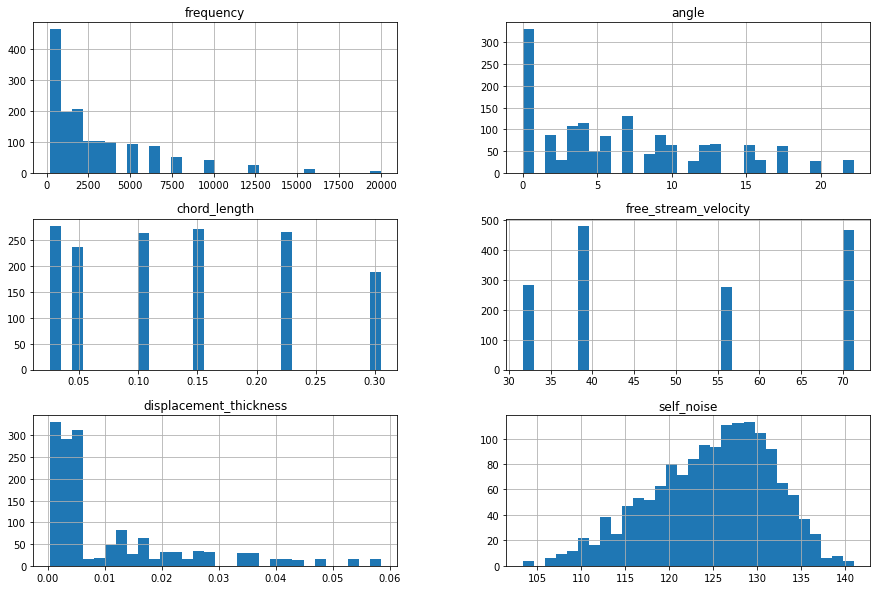

In [9]:
noise.hist(bins=30, figsize=(15, 10))

**Which variables are approximately normally distributed?**
- Noise is normally distrbuted

**Which variables show strong skew?**
- frequency and displacement thickness show strong right skew

**Make a scatterplot of each feature variable with the target variable "self_noise"**

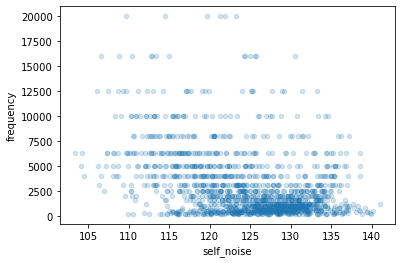

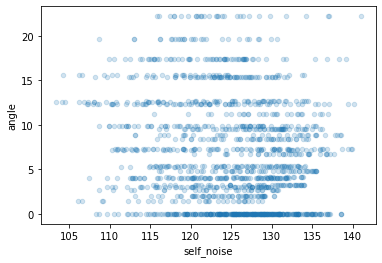

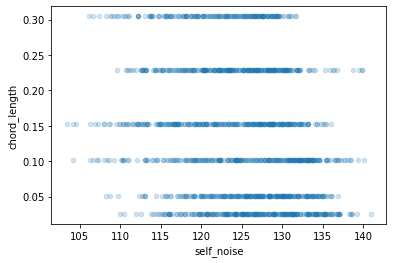

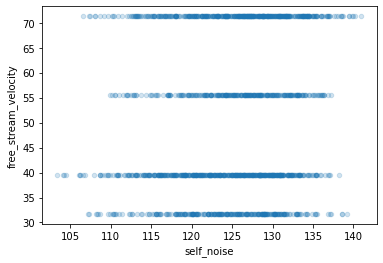

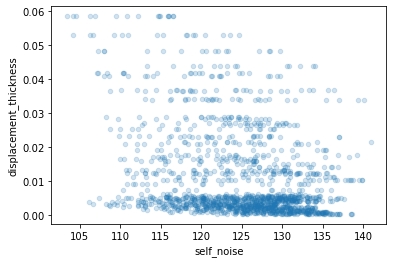

In [10]:
for feature in noise.columns[:-1]:
    noise.plot.scatter(x= "self_noise", y=feature, alpha=0.2);

**Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!**

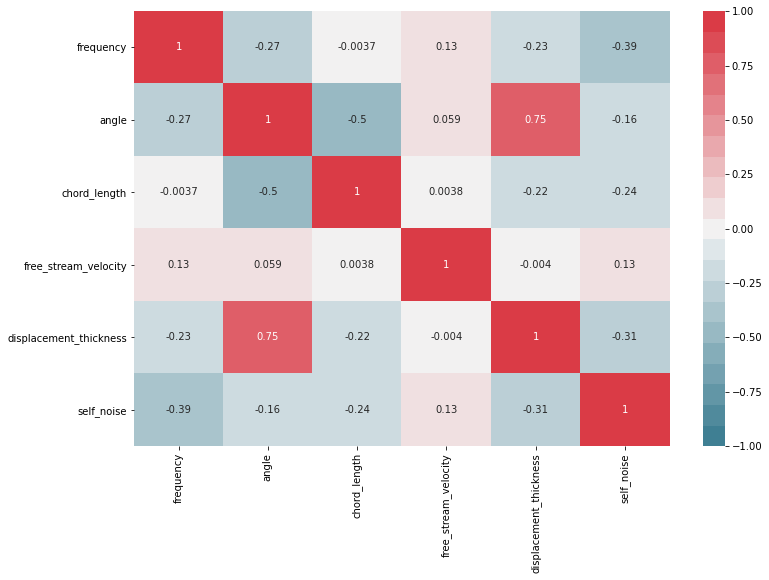

In [11]:
#correlation map without dummy coded soils 
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(
    noise.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
    annot=True,
    ax=ax,
)

**What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point**
- correlation between displacement thickness & angle
- chord length - is this a discrete value? what about free stream velocity?
- chord length and angle are closely correlated

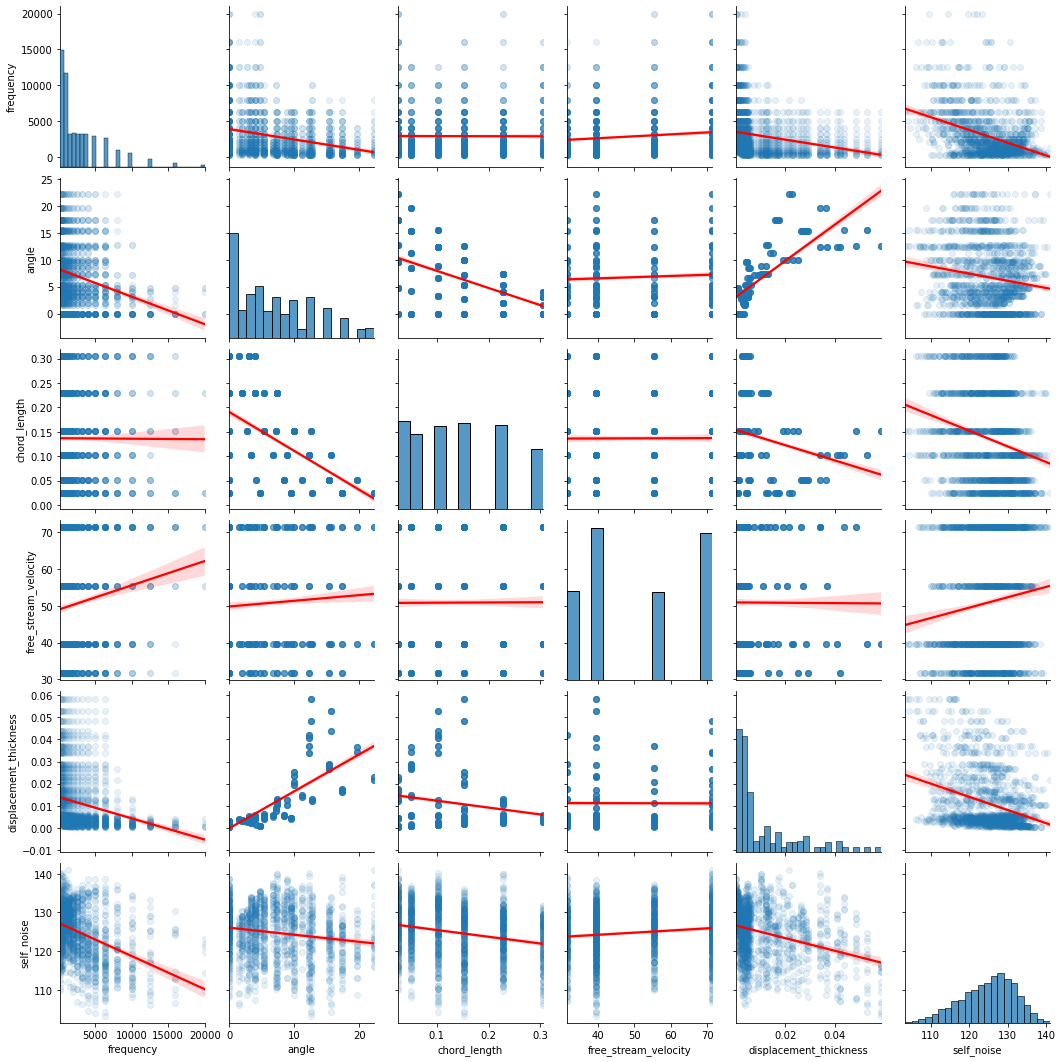

In [12]:
g = sns.pairplot(noise, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#check displacement thickness vs angle since they are highlight correlation above

---

### Linear Regression

In [13]:
lr = LinearRegression()

**Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.**

In [14]:
X = noise.drop(columns="self_noise")
y = noise.loc[:, "self_noise"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [16]:
lr.fit(X_train, y_train) 

LinearRegression()

In [17]:
print(lr.score(X_train,y_train), "is the train score")
print(lr.score(X_test,y_test), "is the test score")

0.5214416938715567 is the train score
0.4982726587932872 is the test score


--

**How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?**
- The model was better than the null model (r^2 of 0) but was not perfect (r^2 of 1). This means that the model has high bias

**How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?**
- Our test score is close to our train score, thus our model is not overfitting and we dont have a variance problem. However, the model is underfitting and has high bias.

**Does your model appear to have more of a bias problem or more of a variance problem? Why?**
- It has more of a bias problem (high bias) because it is underfitting. An architecture that underfits is not capable of capturing the true relationship between the features and the target. 

---

### Random Forest

**Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.**

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestRegressor` and then use `RandomForestRegressor` like any other scikit-learn estimator.

In [19]:
X = noise.drop(columns="self_noise")
y = noise.loc[:, "self_noise"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

print(rfr.score(X_train,y_train), "is the train score")
print(rfr.score(X_test,y_test), "is the test score")

0.9896919200752982 is the train score
0.9278230664800088 is the test score


--

**Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.**
- The model is not underfitting here and the bias has significantly decreased. The model is slightly overfitting here as compared to the linear regression model, and variance has slightly increased

**Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.**
   
   - If we want to reduce the amount of variance in a prediction, we must add bias, thus we must reduce the model complexity. We can reduce high variance by : 
        - Linear Regression (since our linear regression model had high bias, not variance, I am not going to try these)
            -   Regularization (Rdige & Lasso)
        - Other models
            - Decreasing the degree of the polynomial can help decrease the model complexity and fix the problem of high variance (This doesnt apply because linear regression is the lowest polynomial)
        - Random Forest (lets start with Random Forest since it provided us a decent model here)
            - ✓  Increasing the size of the training set
            - ✓  by reducing the number of features in the model
            - ✓ Hyperparamater tuning
                - n_estimators (number of trees) - default is 10 - remember gives diminishing returns 
                - max_depth (how many splits deep trees can go) - default is none - decreases the variance and increases the bias
                - min_samples_leaf - tells each tree to stop splitting if doing so would result in the end node of any resulting branch having less than X leaves

1. increase the size of the training set
    - results: increased test score by about 0.02 but also slightly increased the train score (beware of overfitting)

In [20]:
X = noise.drop(columns=["self_noise"])
y = noise.loc[:, "self_noise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15) #train size is 85% now instead of 70%
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

print(rfr.score(X_train,y_train), "is the train score")
print(rfr.score(X_test,y_test), "is the test score")

0.9910033050304136 is the train score
0.952357692494253 is the test score


2. reduce the number of features in the model. Drop either angle or displacement thickness because they are highly correlated with one another (see below)
    - findings: 
        - dropping angle didn't do much and neither did dropping displacement thickness
        - dropping free_steam_velocity didnt do much either

In [21]:
X = noise.drop(columns=["self_noise", "free_stream_velocity", "angle"])
y = noise.loc[:, "self_noise"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15) #train size is 85% now instead of 70%
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

print(rfr.score(X_train,y_train), "is the train score")
print(rfr.score(X_test,y_test), "is the test score")

0.9886790437198534 is the train score
0.9289456056835701 is the test score


**BONUS: Keep going! Find ways to make your model better.**

3. Hypertuning parameters using RandomizedSearchCV
    - This didnt improve the train score but instead decreased it. hmmm

In [193]:
param_distributions = {'bootstrap': [True, False],
               'max_depth': range(1,200),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1,11),
               'min_samples_split': range(1,11),
               'n_estimators': range(20,150)}

In [194]:
randomized_grid = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state = 1),
    param_distributions=param_distributions,
    cv=KFold(n_splits=10, shuffle=True),
    n_iter = 10,
    n_jobs = -1,
    return_train_score=True
)
randomized_grid.fit(X, y)
randomized_grid.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.58729079 0.5933311  0.59300567 0.59481955
 0.59094696 0.59680004 0.48651117 0.59714647]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan        nan 0.6604409  0.69054794 0.74245268 0.76562029
 0.7413273  0.71120602 0.73678976 0.83964087]
  warnings.warn(


{'n_estimators': 137,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 141,
 'bootstrap': False}

In [195]:
X = noise.drop(columns=["self_noise"])
y = noise.loc[:, "self_noise"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) #train size is 85% now instead of 70%

rfr = RandomForestRegressor()
rfr.set_params(**randomized_grid.best_params_)

rfr.fit(X_train, y_train)

print(rfr.score(X_train,y_train), "is the train score")
print(rfr.score(X_test,y_test), "is the test score")

0.9690856792463118 is the train score
0.8859107638766834 is the test score


---

---

## Classification

### Dataset

**Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?**

- The datset is contains information about credit card applications and the credit approval decisions (class attribute: +,-).The feature columns are ambiguous to remain confidential. This model would be useful to predict if someone would get approved for a credit card. Hmm bias seems likely (and not bias as in variance and bias)

In [7]:
# Load the dataset
credit = pd.read_csv("data/crx.data", names=range(1, 17))

In [8]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**Find out how many rows and columns are in `credit`.**

In [9]:
credit.shape

(690, 16)

**Find out what data types are present.**

In [10]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

**Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"**

In [11]:
credit[credit[2] == "?"] 
#12 rows with ? in column 2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,-
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,+


In [12]:
credit[credit[14] == "?"] 
#13 rows with ? in column 14 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-


#### replace ? with mean of column 2 and turn entire column in floats

In [13]:
#take rows where column 2 does not = ?
credit_col2 = credit[2][credit[2] != "?"]
credit_col2

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: 2, Length: 678, dtype: object

In [14]:
#for each value in credit_col2, turn it into a float and then append it to col2_list
#make col2_list into a dataframe and return the median(ealier I had the mean but since all the data is skewed, I chose the median)
col2_list = []
for value in credit_col2:
    col2_list.append(float(value))

col2_median = pd.DataFrame(col2_list).median()
col2_median

0    28.46
dtype: float64

In [15]:
#replace ? with column 2 mean
credit[2] = credit[2].replace(['?'],col2_median)
credit

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [16]:
#now that we have no ?, turn every value into a float
credit_col2_list = []
for value in credit[2]:
    credit_col2_list.append(float(value))
credit[2] = pd.DataFrame(credit_col2_list)

#### replace ? with mean of column 14 and turn entire column in floats

In [17]:
#take rows where column 14 does not = ?
credit_col14 = credit[14][credit[14] != "?"]

#for each value in credit_col14, turn it into a float and then append it to col14_list
# make col14_list into a dataframe 
col14_list = []
for value in credit_col14:
    col14_list.append(float(value))

#return the mean
col14_median = pd.DataFrame(col14_list).median()

#replace ? with column 14 mean
credit[14] = credit[14].replace(['?'],col14_median)

#now that we have no ?, turn every value into a float
credit_col14_list = []
for value in credit[2]:
    credit_col14_list.append(float(value))
credit[14] = pd.DataFrame(credit_col14_list)

In [18]:
credit.dtypes #column 2 and 14 are now floats

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16     object
dtype: object

In [19]:
#Drop ? columns for the categorical columns where cant fill in for mean
for feature in credit.columns:
    credit = credit[credit[feature] != "?"]

In [20]:
credit.shape

(671, 16)

--

**Find out how many null values there are in each columns.**

In [21]:
credit.isna().sum() #none

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

**Check basic summary information for each column, including categorical columns.**

In [22]:
credit.describe()

,2,3,8,11,14,15
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,31.414054,4.831125,2.264694,2.461997,31.414054,1041.616990
std,11.712632,5.000660,3.377504,4.916433,11.712632,5281.226892
min,13.750000,0.000000,0.000000,0.000000,13.750000,0.000000
25%,22.670000,1.040000,0.165000,0.000000,22.670000,0.000000
50%,28.460000,3.000000,1.000000,0.000000,28.460000,5.000000
75%,37.625000,7.500000,2.750000,3.000000,37.625000,400.000000
max,76.750000,28.000000,28.500000,67.000000,76.750000,100000.000000


In [23]:
credit.describe(include="all")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,671,671.000000,671.000000,671,671,671,671,671.000000,671,671,671.000000,671,671,671.000000,671.000000,671
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,463,NaN,NaN,510,510,135,392,NaN,358,379,NaN,360,614,NaN,NaN,371
mean,NaN,31.414054,4.831125,NaN,NaN,NaN,NaN,2.264694,NaN,NaN,2.461997,NaN,NaN,31.414054,1041.616990,NaN
std,NaN,11.712632,5.000660,NaN,NaN,NaN,NaN,3.377504,NaN,NaN,4.916433,NaN,NaN,11.712632,5281.226892,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,13.750000,0.000000,NaN
25%,NaN,22.670000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,22.670000,0.000000,NaN
50%,NaN,28.460000,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,28.460000,5.000000,NaN
75%,NaN,37.625000,7.500000,NaN,NaN,NaN,NaN,2.750000,NaN,NaN,3.000000,NaN,NaN,37.625000,400.000000,NaN


**Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots**

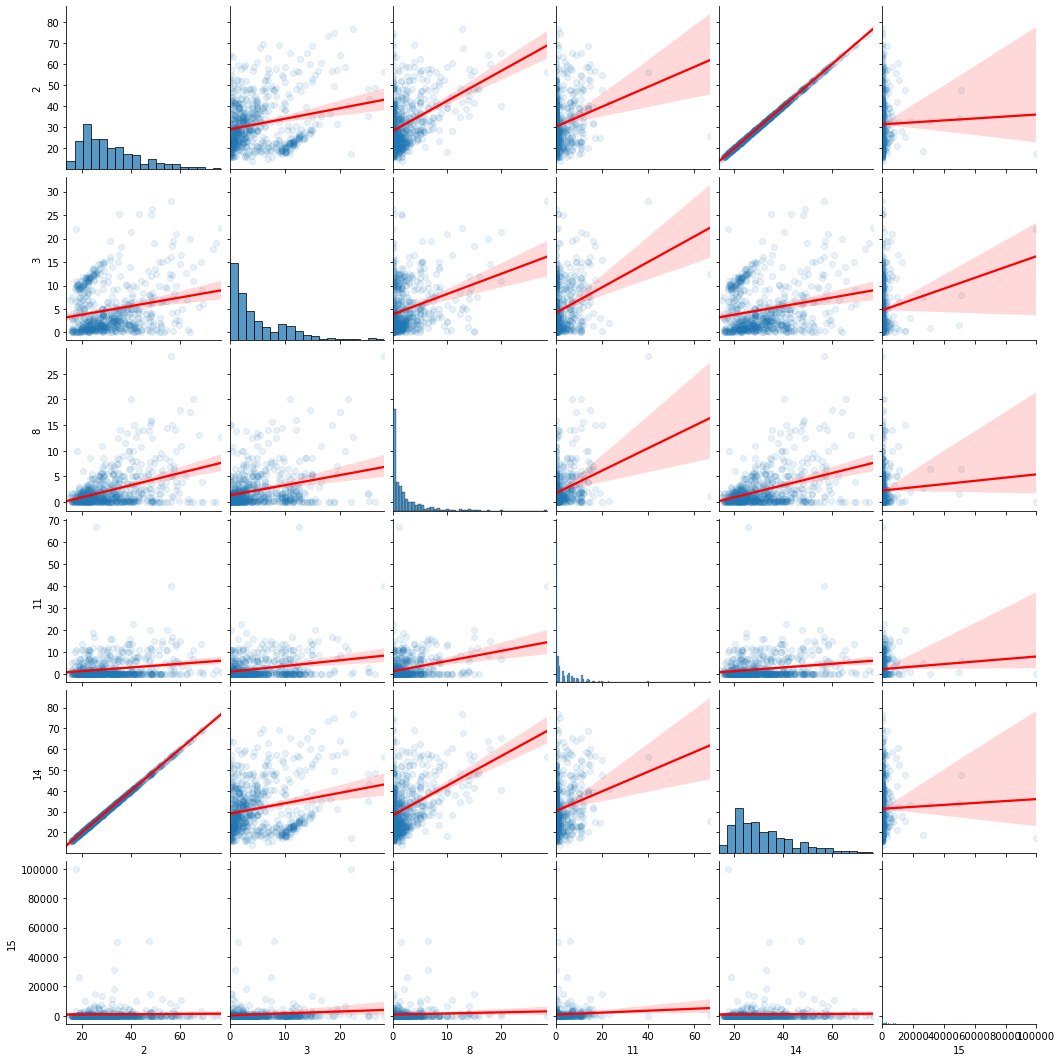

In [24]:
g = sns.pairplot(credit, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

<AxesSubplot:>

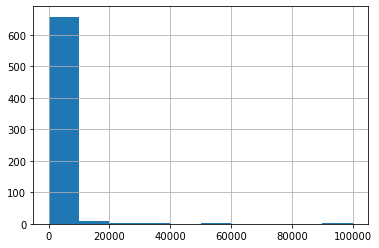

In [25]:
credit[15].hist() #looking at 15 a little closer

<AxesSubplot:>

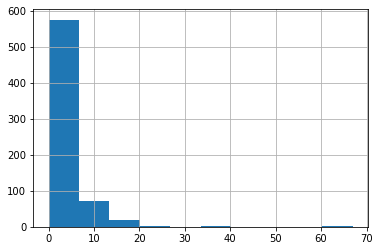

In [26]:
credit[11].hist() #looking at 15 a little closer

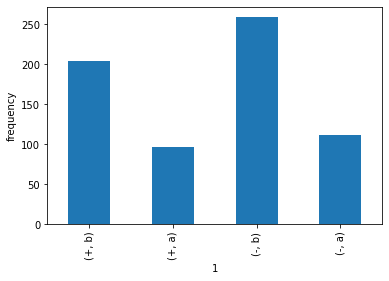

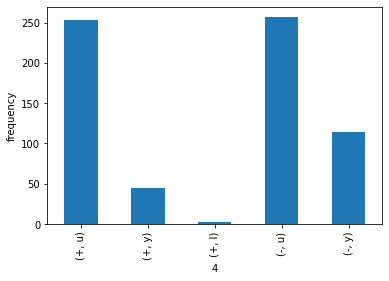

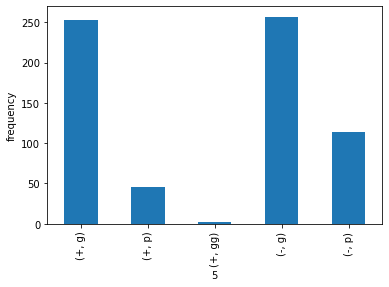

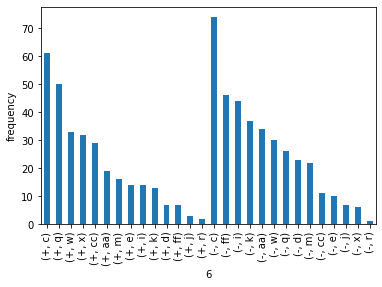

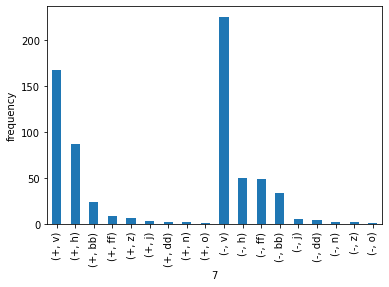

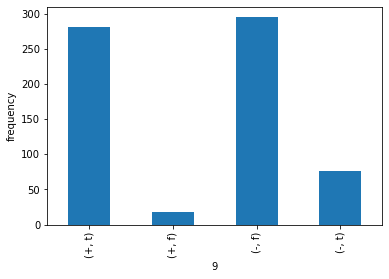

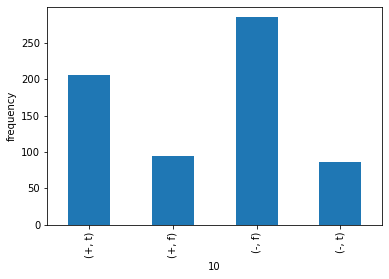

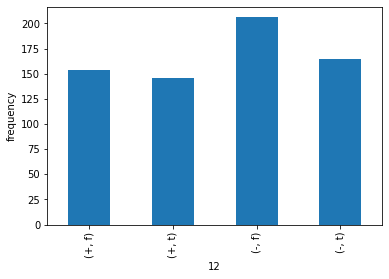

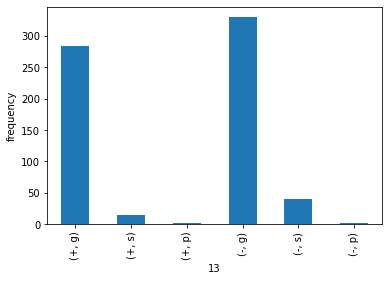

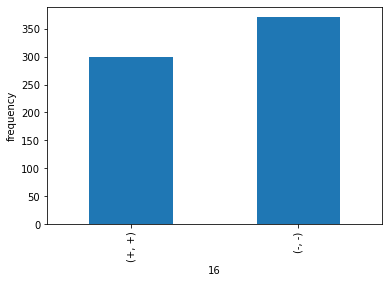

In [27]:
#categorical cols
object_cols = credit.dtypes[(credit.dtypes == 'object')].index.tolist()

for feature in credit[object_cols]:
    plt.figure(feature)
    ax = credit[feature].groupby(credit[16]).value_counts(sort=True).plot.bar()
    ax.set_xlabel(feature)
    ax.set_ylabel("frequency")

plt.show();

##FIX THIS: how do I make this into two separate graphs by +/-?

**Which variables are approximately normally distributed?**

None are normally distributed

**Which variables show strong skew?**

2,3,8,11,14,15 all have strong right skews

**Make a scatterplot of each feature variable with the target variable (`16`).**
  - see bar charts above for categorical features

<Figure size 432x288 with 0 Axes>

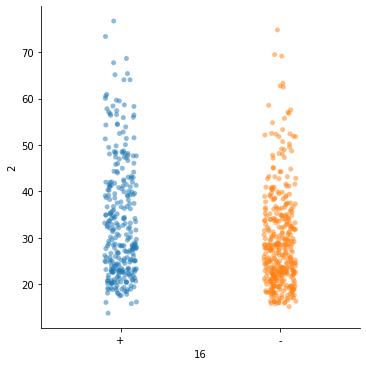

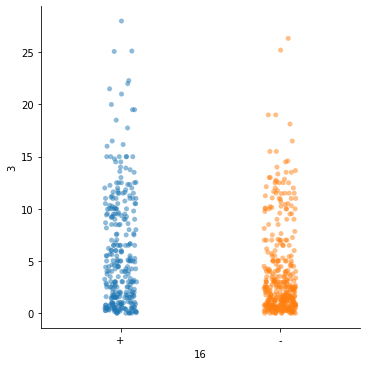

<Figure size 432x288 with 0 Axes>

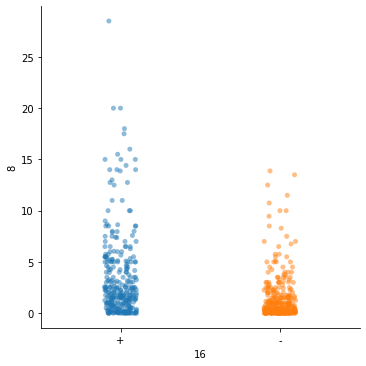

<Figure size 432x288 with 0 Axes>

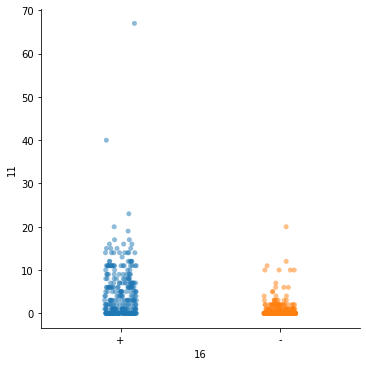

<Figure size 432x288 with 0 Axes>

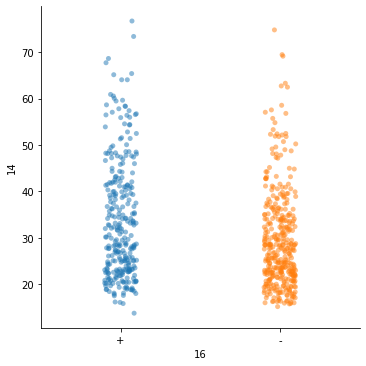

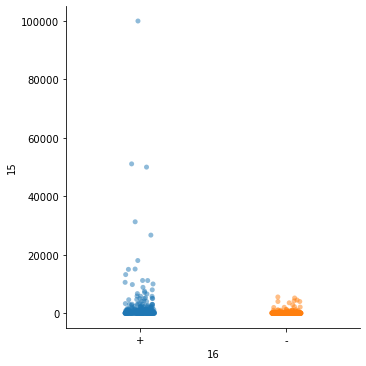

In [28]:
#numeric data
numeric_cols = [2,3,8,11,14,15]

for feature in credit[numeric_cols]:
    plt.figure(feature)
    sns.catplot(x=16, y=feature, data=credit, alpha=0.5)

plt.show();

**Find out how many rows and columns are in `credit`.**

In [29]:
credit.shape

(671, 16)

**Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!**

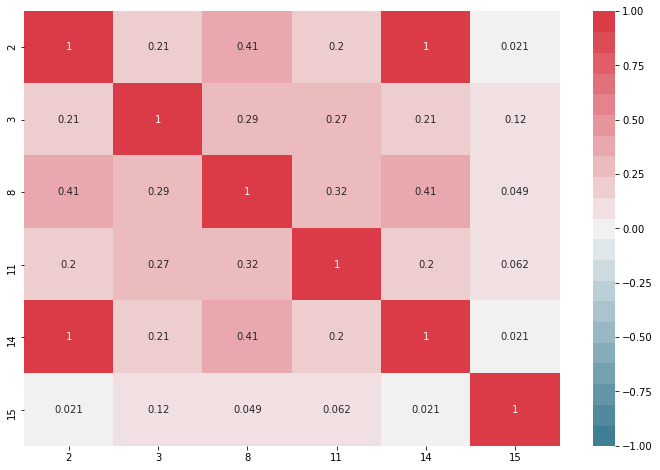

In [30]:
#correlation map without dummy coded soils 
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(
    credit.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
    annot=True,
    ax=ax,
)

**What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.**

- distribution of both categorical and numeric columns
- 

**What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?**

In [31]:
credit[16].value_counts(normalize=True)

-    0.552906
+    0.447094
Name: 16, dtype: float64

- For classification, a "null model" would guess the most common class every time. In this case, it would guess - every time and get 56% accuracy.

----

### Logistic Regression

**Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model**

In [32]:
object_cols

[1, 4, 5, 6, 7, 9, 10, 12, 13, 16]

In [33]:
#dummy coding for each categorical value. Decided  drop_first = False just for my own sake, but dropped 
#one column from +/- so we only have one target vaariable
credit_df = pd.get_dummies(credit, columns=object_cols).drop(columns = "16_-")
credit_df

,2,3,8,11,14,15,1_a,1_b,4_l,4_u,...,9_f,9_t,10_f,10_t,12_f,12_t,13_g,13_p,13_s,16_+
0,30.83,0.000,1.25,1,30.83,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6,58.67,560,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0,24.50,824,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5,27.83,3,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0,20.17,0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,21.08,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
686,22.67,0.750,2.00,2,22.67,394,1,0,0,1,...,1,0,0,1,0,1,1,0,0,0
687,25.25,13.500,2.00,1,25.25,1,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0
688,17.92,0.205,0.04,0,17.92,750,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0


In [34]:
X = credit_df.drop(columns="16_+")
y = credit_df.loc[:, "16_+"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.70)

In [35]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression(solver='lbfgs', max_iter=10000)

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
# Score the model on the test data
print(lr.score(X_train,y_train), "is the train score")
print(lr.score(X_test,y_test), "is the test score")

0.8827292110874201 is the train score
0.8564356435643564 is the test score


**How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?**

In [37]:
y_train.value_counts(normalize=True)

0    0.545842
1    0.454158
Name: 16_+, dtype: float64

- On the training data, our model got it right 88% of the time. Our model outperformed the null model which has 54% accuracy, since it would choose 0 every time. I would say that this says we dont have a bias problem (we are not underfitting)

**How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?**

- model did slightly better on the training set than the test set, meaning that we are overfitting in the train set (thus higher variance).

**Does your model appear to have more of a bias problem or more of a variance problem? Why?**

- Its hard to say, since we dont know what is entirely possible for the best model. I would say we have a variance problem here. If we decrease bias any more, we will be increasing variance and making the set set be less accurate

---

### Random Forest

**Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.**

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestClassifier` and then use `RandomForestClassifier` like any other scikit-learn estimator.

In [38]:
from sklearn.ensemble import RandomForestClassifier

X = credit_df.drop(columns="16_+")
y = credit_df.loc[:, "16_+"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_train,y_train), "is the train score")
print(rfc.score(X_test,y_test), "is the test score")

1.0 is the train score
0.8564356435643564 is the test score


**Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.**

- So we have extremely high variance here. We are overfitting our model, getting a very large train score (1.0!) and a significant different between our train score and out test score

**Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.**
   

- ✓  Increasing the size of the training set
- ✓  by reducing the number of features in the model (random forest basically does this)
- ✓ Hyperparamater tuning
    - n_estimators (number of trees) - default is 10 - remember gives diminishing returns 
    - max_depth (how many splits deep trees can go) - default is none - decreases the variance and increases the bias
    - min_samples_leaf - tells each tree to stop splitting if doing so would result in the end node of any resulting branch having less than X leaves

1. increase the size of the training set
    - results: This didnt do much

In [39]:
X = credit_df.drop(columns="16_+")
y = credit_df.loc[:, "16_+"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_train,y_train), "is the train score")
print(rfc.score(X_test,y_test), "is the test score")

1.0 is the train score
0.8514851485148515 is the test score


2. Hypertuning parameters using RandomizedSearchCV
    - this  increases the test_score a lot but also decreased the training score

In [40]:
param_distributions = {'bootstrap': [True, False],
               'max_depth': range(1,200),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1,11),
               'min_samples_split': range(1,11),
               'n_estimators': range(10,500,50)}

In [41]:
randomized_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state = 42),
    param_distributions=param_distributions,
    cv=KFold(n_splits=10, shuffle=True),
    n_iter = 5,
    return_train_score=True,
    n_jobs = -1
)
randomized_grid.fit(X_test, y_test)
best_params = randomized_grid.best_params_
best_params

{'n_estimators': 60,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 160,
 'bootstrap': True}

In [42]:
randomized_grid.best_score_

0.8327272727272728

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) #train size is 80%

rfc = RandomForestClassifier()
rfc.set_params(**randomized_grid.best_params_)
rfc.fit(X_train, y_train)

print(rfc.score(X_train,y_train), "is the train score")
print(rfc.score(X_test,y_test), "is the test score")

0.9052631578947369 is the train score
0.9306930693069307 is the test score


****BONUS:** Keep going! Find ways to make your model better.**

In [58]:
#rerun this with larger train size since we have a lot of data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.90) #train size is 80%

rfc = RandomForestClassifier()
rfc.set_params(**randomized_grid.best_params_)
rfc.fit(X_train, y_train)

print(rfc.score(X_train,y_train), "is the train score")
print(rfc.score(X_test,y_test), "is the test score")

0.9137645107794361 is the train score
0.9117647058823529 is the test score


---

## Push to gihub

In [59]:
!git add "unit3_project.ipynb"

In [60]:
!git commit -m "added RFC parameters"

[master 246207d] added RFC parameters
 1 file changed, 215 insertions(+), 209 deletions(-)


In [61]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1010.55 KiB | 15.31 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://git.generalassemb.ly/fachiappetta/unit3_project.git
   7d78693..246207d  master -> master
